В предыдущем домашнем задании я сохранил в dataframe кратку информацию по всем объектам.
Для выполнения этого задания требовалось скачать подробную информацию по всем объектам.
Для выполнения текущего задания в краткой информации отсутствуют только данные по машиноместам, остальная информация есть.
Так как АПИ сломалось (или по другим причинам не удается скачать оттуда данные), для выполнения текущего ДЗ я взял ранее скаченный датафрейм

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [75]:
df = pd.read_csv("vacancies.csv")

In [76]:
df = df.reset_index(drop=True)
df

,hobjId,objId,rpdRegionCd,objAddr,objFloorMin,objFloorMax,objElemLivingCnt,objReady100PercDt,objSquareLiving,objCompensFundFlg,...,developer.orgForm.fullForm,developer.orgForm.shortForm,developer.companyGroup,developer.devInn,objCommercNm,complexShortName,developer.bankruptStage.bankruptStageCd,developer.bankruptStage.bankruptStageDesc,developer.bankruptStage.bankruptLawUrl,developer.orgBankruptMsgDttm
0,34754,13399,72,"г Тюмень, ул Профсоюзная, д. 56",1,1,0,2024-12-31,0.00,0,...,Акционерное общество,АО,5776.0,7701651356,NaN,NaN,NaN,NaN,NaN,NaN
1,37219,13391,72,"г Тюмень, ул Профсоюзная, д. 56",3,12,44,2023-12-31,4343.90,1,...,Акционерное общество,АО,5776.0,7701651356,NaN,NaN,NaN,NaN,NaN,NaN
2,39024,13383,72,"г Тюмень, ул Профсоюзная, д. 56",4,20,68,2023-12-31,6423.85,1,...,Акционерное общество,АО,5776.0,7701651356,NaN,NaN,NaN,NaN,NaN,NaN
3,37165,13398,72,"г Тюмень, ул Профсоюзная, д. 56",7,10,43,2024-12-31,4812.98,0,...,Акционерное общество,АО,5776.0,7701651356,NaN,NaN,NaN,NaN,NaN,NaN
4,37201,13397,72,"г Тюмень, ул Профсоюзная, д. 56",6,12,65,2024-12-31,6251.10,0,...,Акционерное общество,АО,5776.0,7701651356,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11654,136847,56133,32,поселок Свень,9,9,63,2032-06-30,3842.25,0,...,Общество с ограниченной ответственностью,ООО,5724.0,3235015191,ЖК Соборный,NaN,NaN,NaN,NaN,NaN
11655,136842,56128,32,поселок Свень,9,9,98,2024-12-31,6248.34,0,...,Общество с ограниченной ответственностью,ООО,5724.0,3235015191,ЖК Соборный,NaN,NaN,NaN,NaN,NaN
11656,136843,56129,32,поселок Свень,9,9,103,2026-06-30,6762.46,0,...,Общество с ограниченной ответственностью,ООО,5724.0,3235015191,ЖК Соборный,NaN,NaN,NaN,NaN,NaN
11657,136844,56130,32,поселок Свень,9,9,110,2027-12-31,7092.53,0,...,Общество с ограниченной ответственностью,ООО,5724.0,3235015191,ЖК Соборный,NaN,NaN,NaN,NaN,NaN


In [77]:
# смотрим, есть столбцы и в каких столбцах есть пропуски, и сколько
df.isnull().sum()

hobjId                                           0
objId                                            0
rpdRegionCd                                      0
objAddr                                          0
objFloorMin                                      0
objFloorMax                                      0
objElemLivingCnt                                 0
objReady100PercDt                                0
objSquareLiving                                  0
objCompensFundFlg                                0
objProblemFlg                                    0
latitude                                         0
longitude                                        0
problemFlag                                      0
siteStatus                                       0
objGuarantyEscrowFlg                             0
residentialBuildings                             0
rpdNum                                           0
pdId                                             0
buildType                      

так как в датафрейме есть столбцы, почти полностью состоящие из пропусков, то такие столбцы можем смело удалять - они никак не помогут в анализе. 

Также в анализе не нужны данные по застройщику - удаляем все, что связано с developer

фото тоже не нужно

не нужны и названия ЖК (objCommercNm) - для анализа не используются и слишком много пропусков, которые нельзя заполнить каким-то средним значением

также удалим некоторые столбцы, в которых нет пропусков, но для анализа они не понадобятся

    objCompensFundFlg
    
    objProblemFlg
    
    problemFlag
    
    objGuarantyEscrowFlg
    
    rpdNum - проектная декларация
    
    pdId

In [78]:
df = df.drop(['developer.devId', 
              'developer.shortName',
              'developer.fullName',
              'developer.groupName',
              'developer.orgForm.id',
              'developer.orgForm.fullForm',
              'developer.orgForm.shortForm',
              'developer.companyGroup',
              'developer.devInn', 
              'developer.bankruptStage.bankruptStageCd', 
              'developer.bankruptStage.bankruptStageDesc', 
              'developer.bankruptStage.bankruptLawUrl', 
              'developer.orgBankruptMsgDttm',
              'complexShortName',
              'hobjRenderPhotoUrl',
              'objCommercNm',
              'objCompensFundFlg',
              'objProblemFlg',
              'problemFlag',
              'objGuarantyEscrowFlg',
              'rpdNum',
              'pdId',
              'objPublDt'], axis=1)

In [79]:
# смотрим, в каких столбцах есть пропуски и сколько
df.isnull().sum()

hobjId                     0
objId                      0
rpdRegionCd                0
objAddr                    0
objFloorMin                0
objFloorMax                0
objElemLivingCnt           0
objReady100PercDt          0
objSquareLiving            0
latitude                   0
longitude                  0
siteStatus                 0
residentialBuildings       0
buildType                  0
objStatus                  0
objPriceAVG             3505
dtype: int64

незаполненные значения есть только у колонки "Цена за квадратный метр"

In [80]:
df = df.rename(columns = {'objFloorMin': 'минимум_этажей',
                     'objFloorMax': 'максимум_этажей',
                     'objAddr': 'адрес',
                     'rpdRegionCd': 'код_региона',
                     'latitude': 'широта',
                     'longitude': 'долгота',
                     'residentialBuildings': 'тип_здания(код)',
                     'buildType': 'тип_здания',
                     'objPriceAVG': 'цена_метра',
                     'objElemLivingCnt': 'количество_квартир',
                     'objReady100PercDt': 'ввод_в_эксплуатацию',
                     'objSquareLiving': 'жилая_площадь',
                     'siteStatus': 'статус',
                     'objStatus': 'статус(код)'})

In [81]:
df

,hobjId,objId,код_региона,адрес,минимум_этажей,максимум_этажей,количество_квартир,ввод_в_эксплуатацию,жилая_площадь,широта,долгота,статус,тип_здания(код),тип_здания,статус(код),цена_метра
0,34754,13399,72,"г Тюмень, ул Профсоюзная, д. 56",1,1,0,2024-12-31,0.00,57.1519,65.5544,Строящиеся,0,Нежилое,0,50768.0
1,37219,13391,72,"г Тюмень, ул Профсоюзная, д. 56",3,12,44,2023-12-31,4343.90,57.1541,65.5595,Строящиеся,1,Жилое,0,62638.0
2,39024,13383,72,"г Тюмень, ул Профсоюзная, д. 56",4,20,68,2023-12-31,6423.85,57.1519,65.5536,Строящиеся,1,Жилое,0,66773.0
3,37165,13398,72,"г Тюмень, ул Профсоюзная, д. 56",7,10,43,2024-12-31,4812.98,57.1519,65.5544,Строящиеся,1,Жилое,0,47886.0
4,37201,13397,72,"г Тюмень, ул Профсоюзная, д. 56",6,12,65,2024-12-31,6251.10,57.1519,65.5544,Строящиеся,1,Жилое,0,47163.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11654,136847,56133,32,поселок Свень,9,9,63,2032-06-30,3842.25,53.2159,34.4496,Строящиеся,1,Жилое,0,NaN
11655,136842,56128,32,поселок Свень,9,9,98,2024-12-31,6248.34,53.1385,34.3635,Строящиеся,1,Жилое,0,NaN
11656,136843,56129,32,поселок Свень,9,9,103,2026-06-30,6762.46,53.2163,34.4503,Строящиеся,1,Жилое,0,NaN
11657,136844,56130,32,поселок Свень,9,9,110,2027-12-31,7092.53,53.2161,34.4494,Строящиеся,1,Жилое,0,NaN


In [82]:
df.dtypes

hobjId                   int64
objId                    int64
код_региона              int64
адрес                   object
минимум_этажей           int64
максимум_этажей          int64
количество_квартир       int64
ввод_в_эксплуатацию     object
жилая_площадь          float64
широта                 float64
долгота                float64
статус                  object
тип_здания(код)          int64
тип_здания              object
статус(код)              int64
цена_метра             float64
dtype: object

типы всех столбцов, которые нужны для анализа, являются числовыми

In [83]:
import seaborn as sns

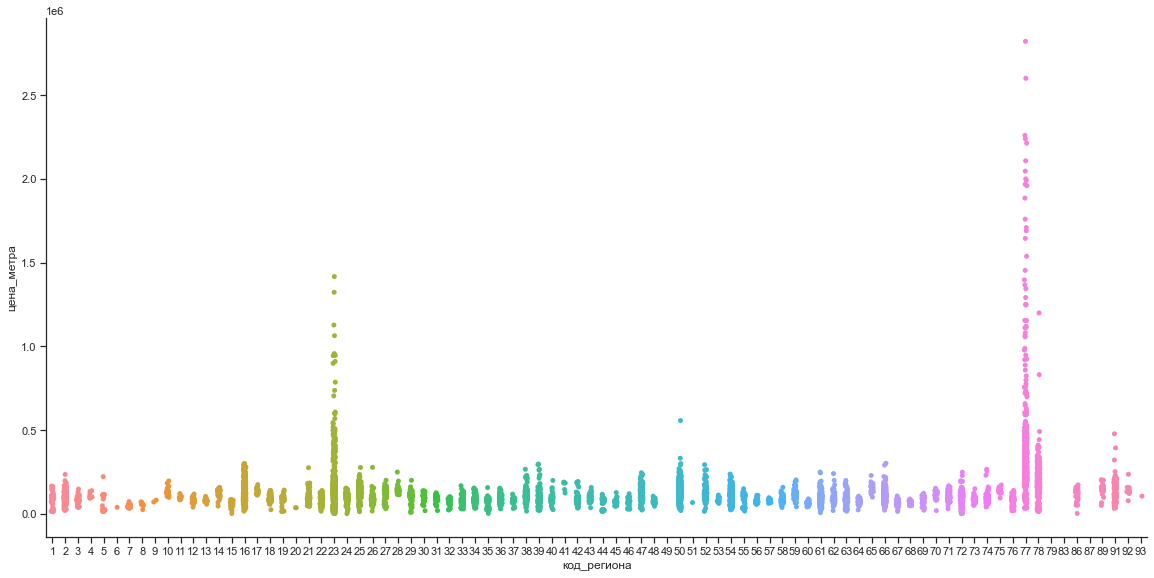

In [84]:
# Нанесем все ЖК на один график для наглядности, распределив по регионам и указав стоимость метра в каждом ЖК
sns.set(style="ticks", color_codes=True)
sns.catplot(
    x='код_региона',
    y='цена_метра', 
    data=df, 
    jitter=0.1,
    height=8, 
    aspect=2, 
    kind='strip', 
    dodge=True)

<AxesSubplot:xlabel='долгота', ylabel='широта'>

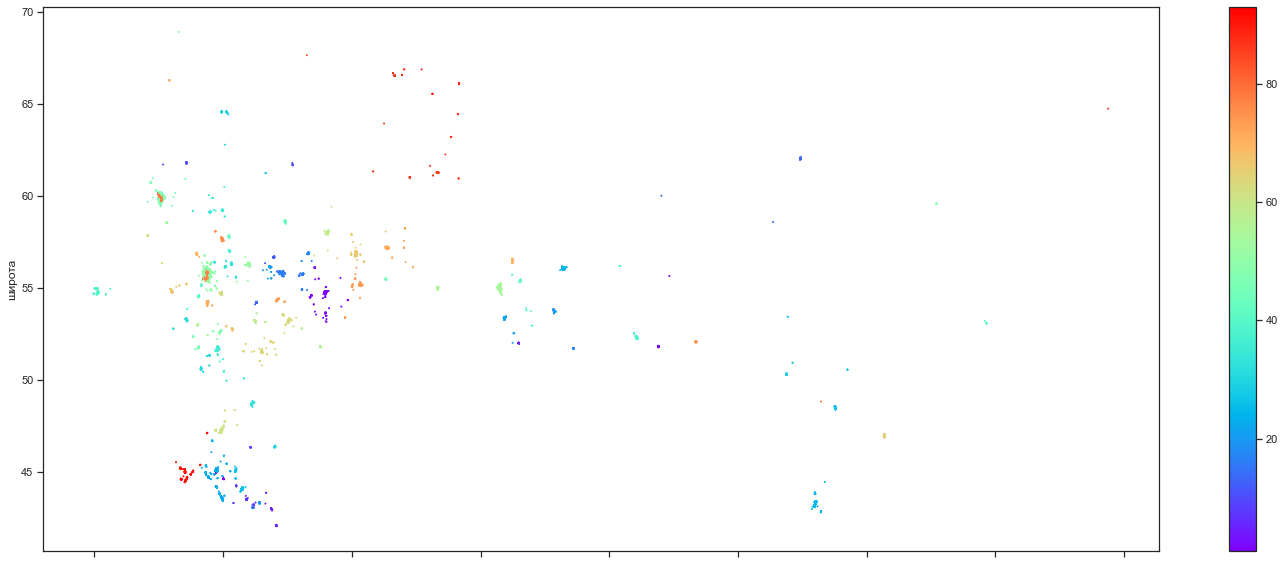

In [85]:
# наносим все строящиеся объекты на карту, разделяем регионы по цветам
color = df['код_региона']
df.plot.scatter(x='долгота', y='широта', c=color, s=1, figsize=(25 , 10), cmap='rainbow')

По карте распределения видно, что Москва, Московская область, Питер и Ленинградская область застраиваются по все своей площади. В остальных регионал строительство идет менее плотно, хотя есть очаги плотной застройки

# Стоимоть квадратного метра в различных регионах

<AxesSubplot:xlabel='код_региона'>

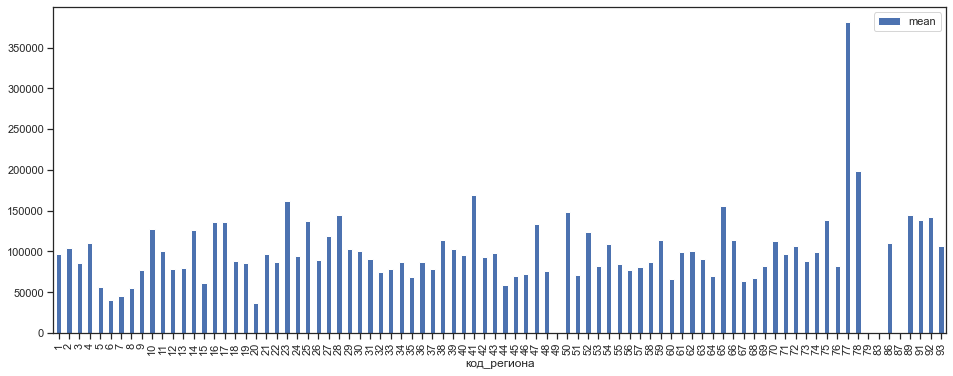

In [86]:
# группируем все цены по регионам и агрегируем как среднее значение. 
# При использовании mean пропуски не учитываются, поэтому отдельно их вырезать не нужно
df_mean_price = df.groupby('код_региона').agg({'цена_метра': ['mean'],'широта': ['mean'],'долгота': ['mean']}). reset_index()
df_mean_price.plot(x='код_региона', y='цена_метра', kind='bar', figsize=(16 , 6))

Москва сильно отрывается от всех остальных регионов России по стоимости квадратного метра жилья.
На втором месте Санкт-Петербург, который не на много обошел Камчатский край
В Краснодарскойм крае метр жилья стоит больше, чем в Московской области

<AxesSubplot:xlabel='долгота', ylabel='широта'>

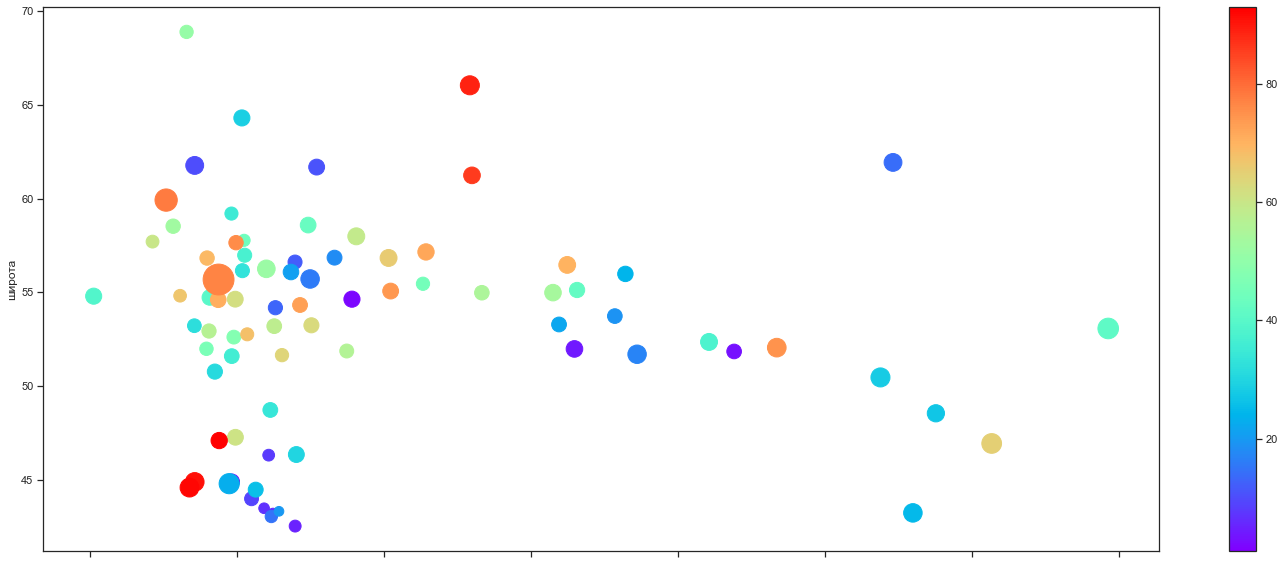

In [87]:
# наносим на карту средни цены и показываем их размером точки, разделяем регионы по цветам
color = df_mean_price['код_региона']
size = df_mean_price['цена_метра'] / 400
df_mean_price.plot.scatter(x='долгота', y='широта', c=color, s=size, figsize=(25 , 10), cmap='rainbow')

# Вывод объемов жилья в различных регионах по годам

In [88]:
# создаем новый столбец "Год ввода", в который заносим только год ввода в эксплуатацию с типом "int"
df['Год_ввода'] = df.apply(lambda x: int(x['ввод_в_эксплуатацию'].split('-')[0]), axis=1)

In [89]:

# Группируем по региону и году ввода в эксплуатацию
# df_sum_square = df.groupby(['код_региона', 'Год_ввода']).agg({'жилая_площадь': ['sum']}).unstack()
df_sum_square = df.groupby(['код_региона', 'Год_ввода']).agg({'жилая_площадь': ['sum']}).unstack()
df_sum_square

жилая_площадь                                            \
                      sum                                             
Год_ввода            2018 2019 2020 2021 2022       2023       2024   
код_региона                                                           
1                     NaN  NaN  NaN  NaN  NaN   11350.25  142047.45   
2                     NaN  NaN  NaN  NaN  NaN  251695.81  906831.12   
3                     NaN  NaN  NaN  NaN  NaN   47507.76  113549.28   
4                     NaN  NaN  NaN  NaN  NaN   12988.14    6867.48   
5                     NaN  NaN  NaN  NaN  NaN  128670.53   63475.35   
...                   ...  ...  ...  ...  ...        ...        ...   
87                    NaN  NaN  NaN  NaN  NaN    2142.55        NaN   
89                    NaN  NaN  NaN  NaN  NaN    4840.14   95628.69   
91                    NaN  NaN  NaN  NaN  NaN   37971.03  255961.62   
92                    NaN  NaN  NaN  NaN  NaN   12196.76   43127.30   
93                    NaN  NaN  NaN  NaN  NaN        NaN   11823.04   

                                              ...                           \
                                              ...                            
Год_ввода         2025       2026       2027  ... 2029 2030 2031 2032 2033   
код_региона                                   ...                            
1            135031.46   59532.99        NaN  ...  NaN  NaN  NaN  NaN  NaN   
2            839400.27  708320.31  186919.04  ...  NaN  NaN  NaN  NaN  NaN   
3            103638.25   80340.55   17408.80  ...  NaN  NaN  NaN  NaN  NaN   
4                  NaN   15949.10   16413.50  ...  NaN  NaN  NaN  NaN  NaN   
5            151990.90   94014.36   22874.35  ...  NaN  NaN  NaN  NaN  NaN   
...                ...        ...        ...  ...  ...  ...  ...  ...  ...   
87                 NaN        NaN        NaN  ...  NaN  NaN  NaN  NaN  NaN   
89            33006.88   50815.94    2845.78  ...  NaN  NaN  NaN  NaN  NaN   
91           231619.96  265986.29  156128.01  ...  NaN  NaN  NaN  NaN  NaN   
92            41698.81        NaN        NaN  ...  NaN  NaN  NaN  NaN  NaN   
93                 NaN        NaN        NaN  ...  NaN  NaN  NaN  NaN  NaN   

                                      
                                      
Год_ввода   2034 2035 2036 2038 2039  
код_региона                           
1            NaN  NaN  NaN  NaN  NaN  
2            NaN  NaN  NaN  NaN  NaN  
3            NaN  NaN  NaN  NaN  NaN  
4            NaN  NaN  NaN  NaN  NaN  
5            NaN  NaN  NaN  NaN  NaN  
...          ...  ...  ...  ...  ...  
87           NaN  NaN  NaN  NaN  NaN  
89           NaN  NaN  NaN  NaN  NaN  
91           NaN  NaN  NaN  NaN  NaN  
92           NaN  NaN  NaN  NaN  NaN  
93           NaN  NaN  NaN  NaN  NaN  

[86 rows x 21 columns]

In [ ]:
df_sum_square.plot(kind = "barh", figsize=(20 , 200))
# plt.legend(df_sum_square['one'].tolist())
# plt.show()

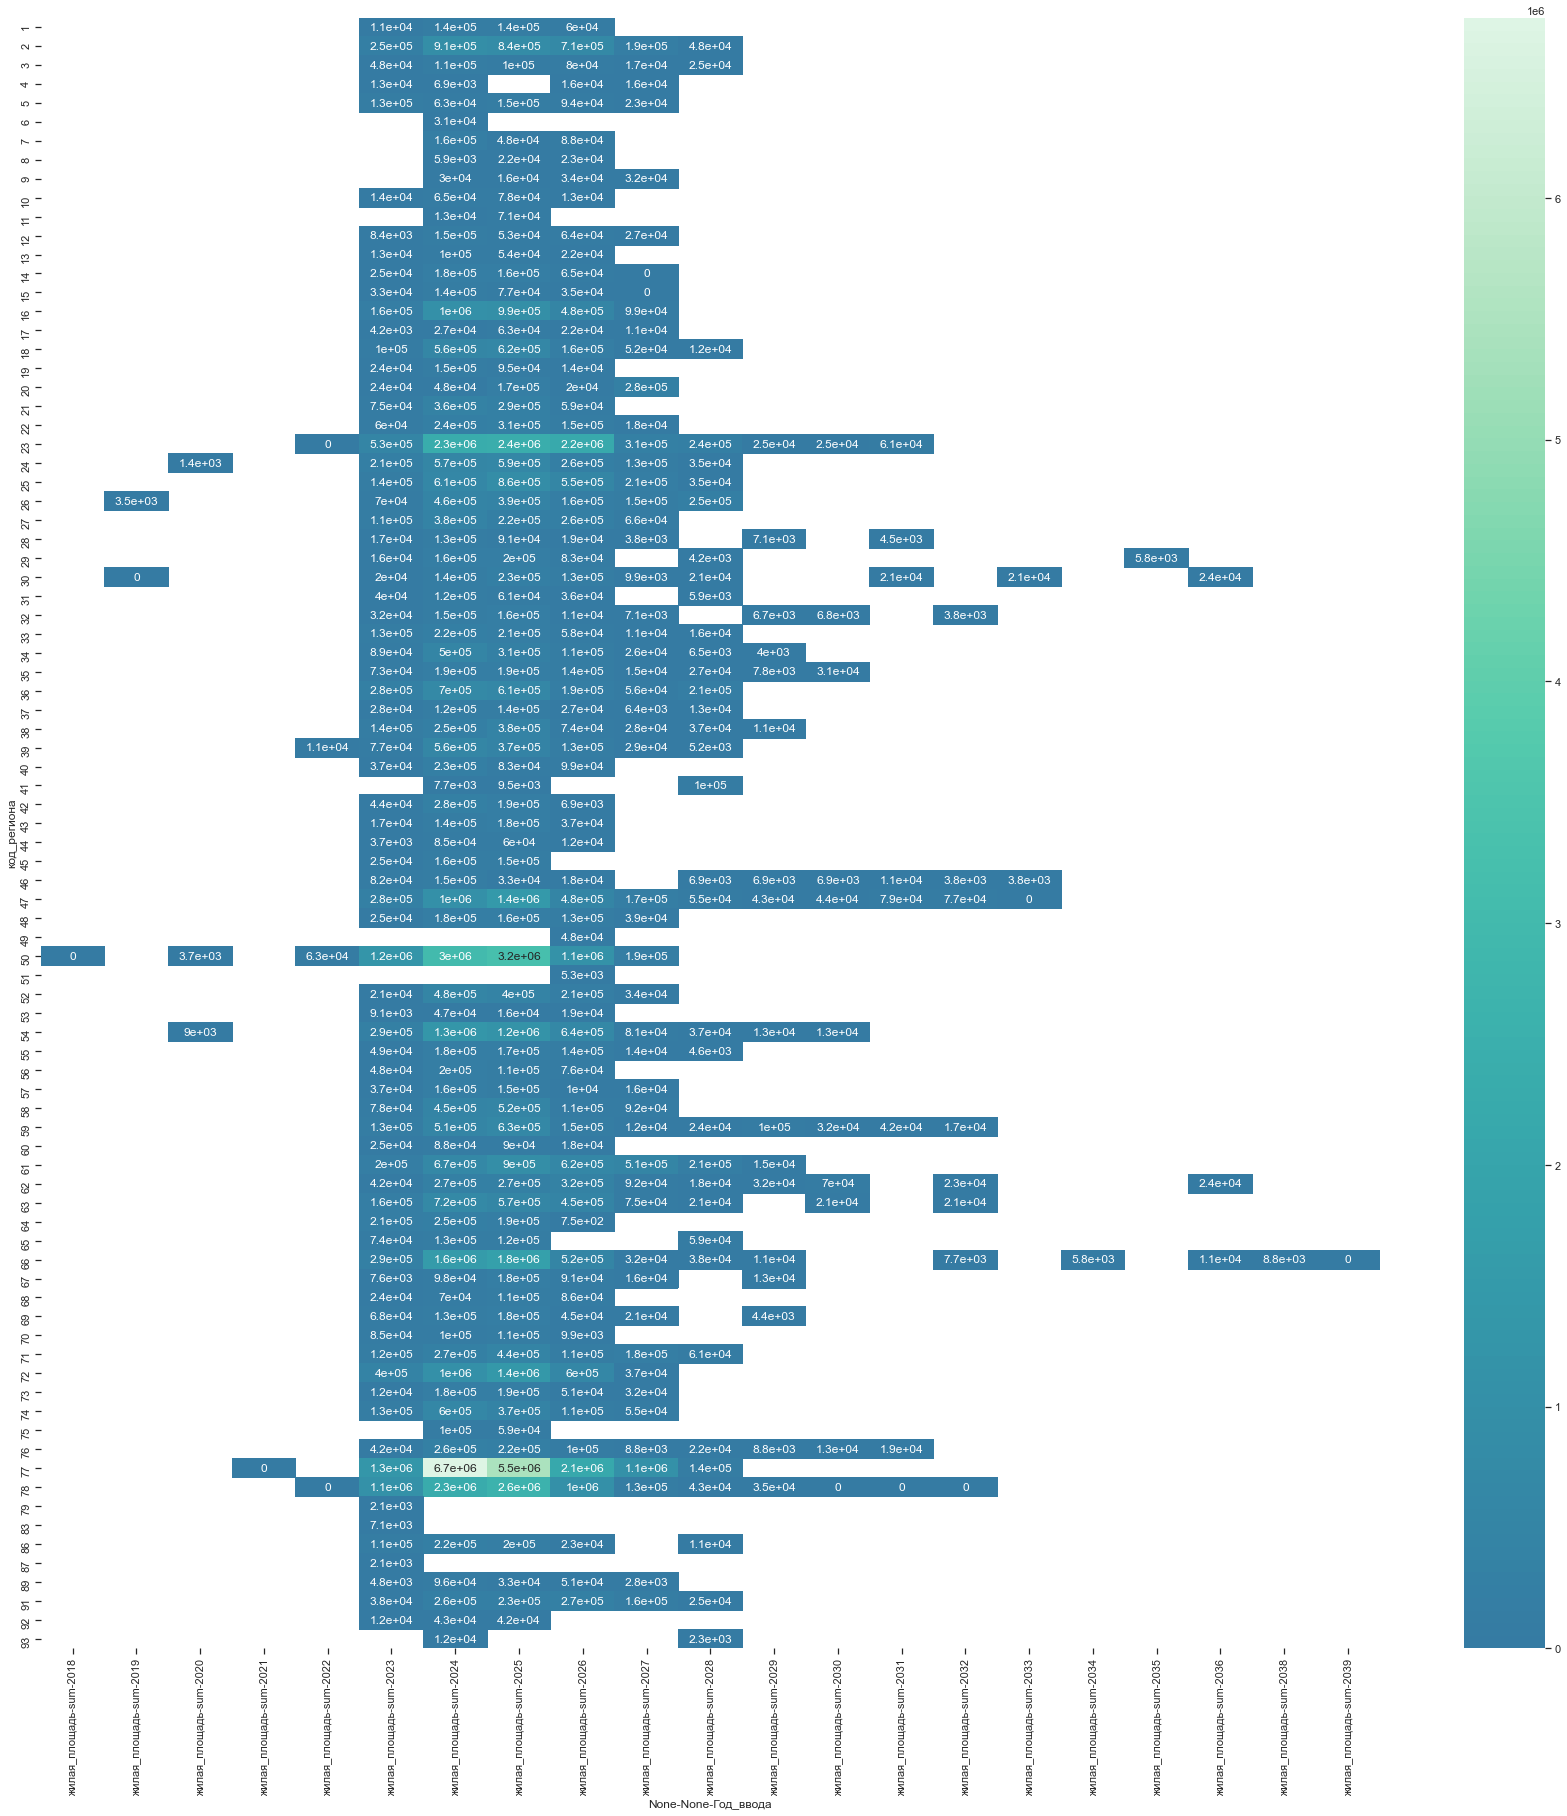

In [91]:
plt.figure(figsize=(30, 30))
sns.heatmap(df_sum_square, center=0, cmap='mako', annot=True)
plt.show()

неизвестно, сколько появится еще жилих комплексов, которые введут в последующих годах, но исходя из текущей тепловой карты видно:
 - самый большой объем вводимого жилья ожидается в 2024 году в Москве
 - также в лидерах Московская область, Санкт-Петербург, Краснодарский край

# Сравнение этажности домов

<AxesSubplot:xlabel='код_региона'>

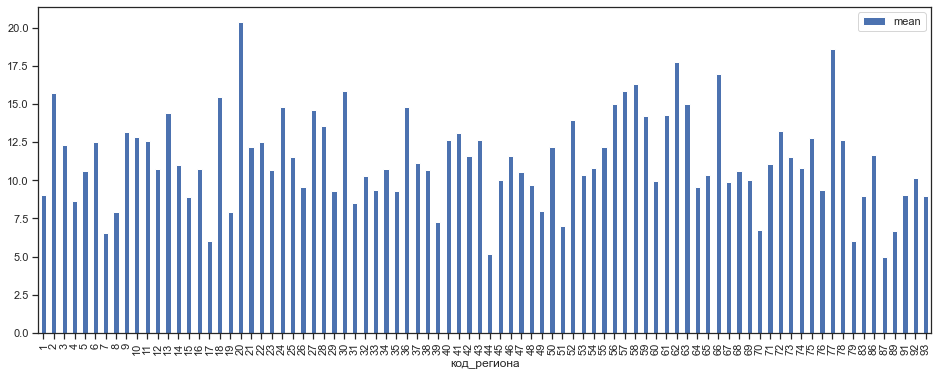

In [92]:
# группируем все этажности по регионам и агрегируем как среднее значение. 
# При использовании mean пропуски не учитываются, поэтому отдельно их вырезать не нужно
df_mean_floor = df.groupby('код_региона').agg({'максимум_этажей': ['mean'],'широта': ['mean'],'долгота': ['mean']}). reset_index()
df_mean_floor.plot(x='код_региона', y='максимум_этажей', kind='bar', figsize=(16 , 6))

<AxesSubplot:xlabel='долгота', ylabel='широта'>

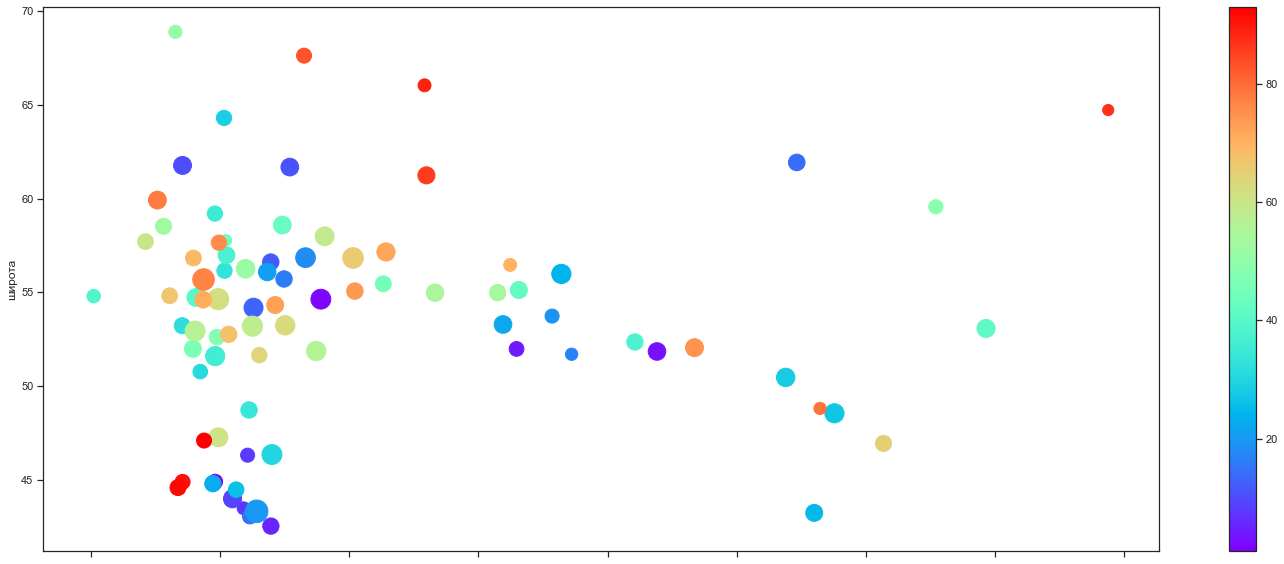

In [93]:
# наносим на карту этажность в разных регионах и показываем их размером точки, разделяем регионы по цветам
color = df_mean_floor['код_региона']
size = df_mean_floor['максимум_этажей'] * 25
df_mean_floor.plot.scatter(x='долгота', y='широта', c=color, s=size, figsize=(25 , 10), cmap='rainbow')

По графикам видно, что на первом месте по средней высоте зданий, на первом месте находится Чеченская республика, на втором - Москва
Самый низкий регион - Чукотский автономный округ

# Сравниваем количество квартир

<AxesSubplot:xlabel='код_региона'>

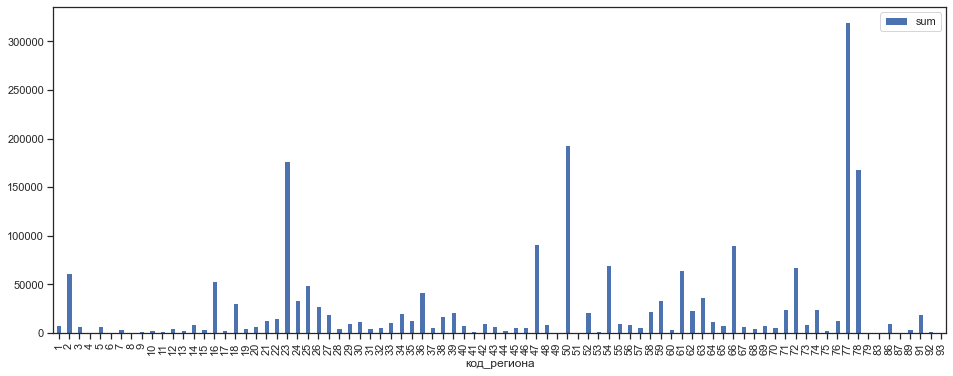

In [94]:
# группируем все этажности по регионам и агрегируем как сумма всех квартир.
df_count_flats = df.groupby('код_региона').agg({'количество_квартир': ['sum'],'широта': ['mean'],'долгота': ['mean']}). reset_index()
df_count_flats.plot(x='код_региона', y='количество_квартир', kind='bar', figsize=(16 , 6))

<AxesSubplot:xlabel='долгота', ylabel='широта'>

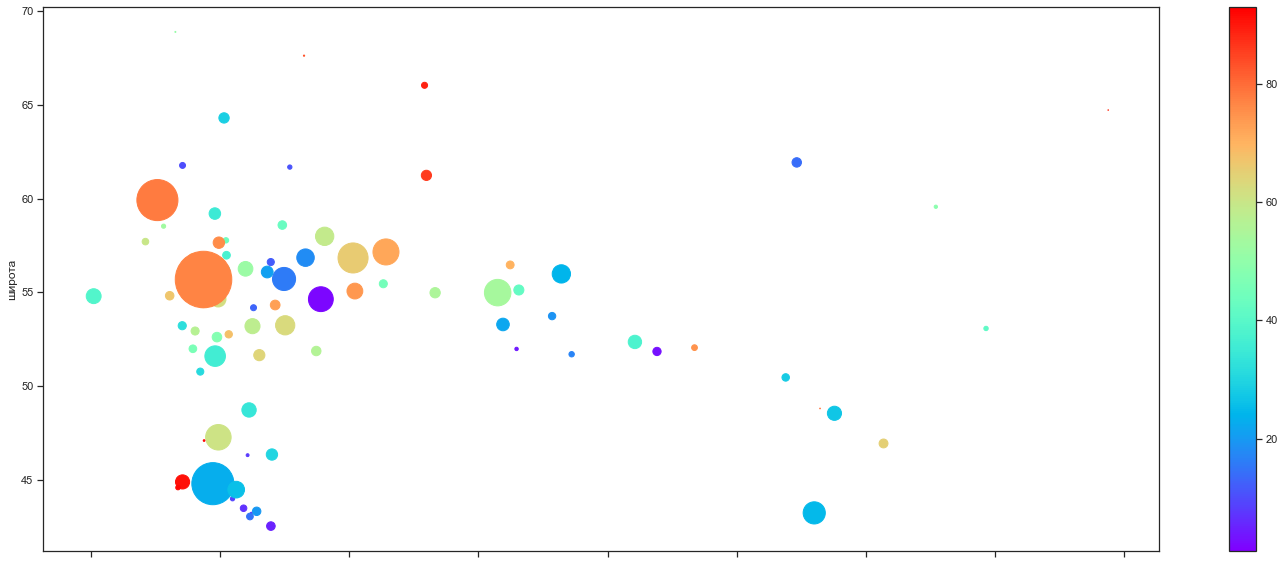

In [95]:
# наносим на карту количество квартир в разных регионах и показываем их размером точки, разделяем регионы по цветам
color = df_count_flats['код_региона']
size = df_count_flats['количество_квартир'] / 100
df_count_flats.plot.scatter(x='долгота', y='широта', c=color, s=size, figsize=(25 , 10), cmap='rainbow')

Ожидаемо, больше всего квартир в Москве
Далее идут Московская область, Краснодарский край и Питер

# Сравниваем жилую площадь

<AxesSubplot:xlabel='код_региона'>

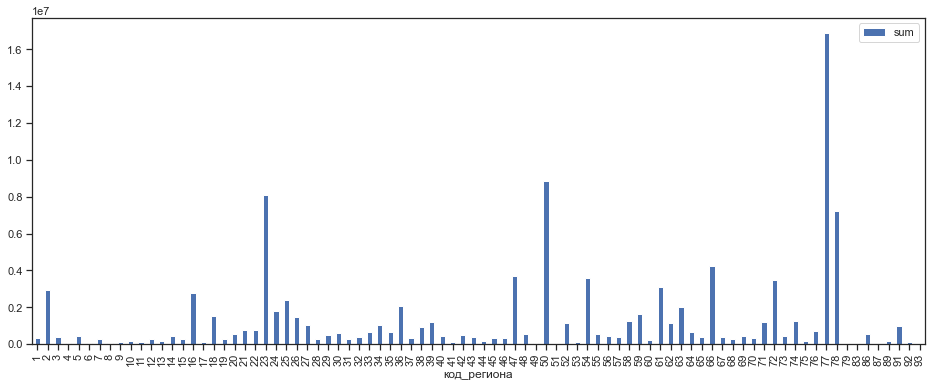

In [96]:
# группируем все этажности по регионам и агрегируем как сумма всех квартир.
df_sum_squares = df.groupby('код_региона').agg({'жилая_площадь': ['sum'],'широта': ['mean'],'долгота': ['mean']}). reset_index()
df_sum_squares.plot(x='код_региона', y='жилая_площадь', kind='bar', figsize=(16 , 6))

<AxesSubplot:xlabel='долгота', ylabel='широта'>

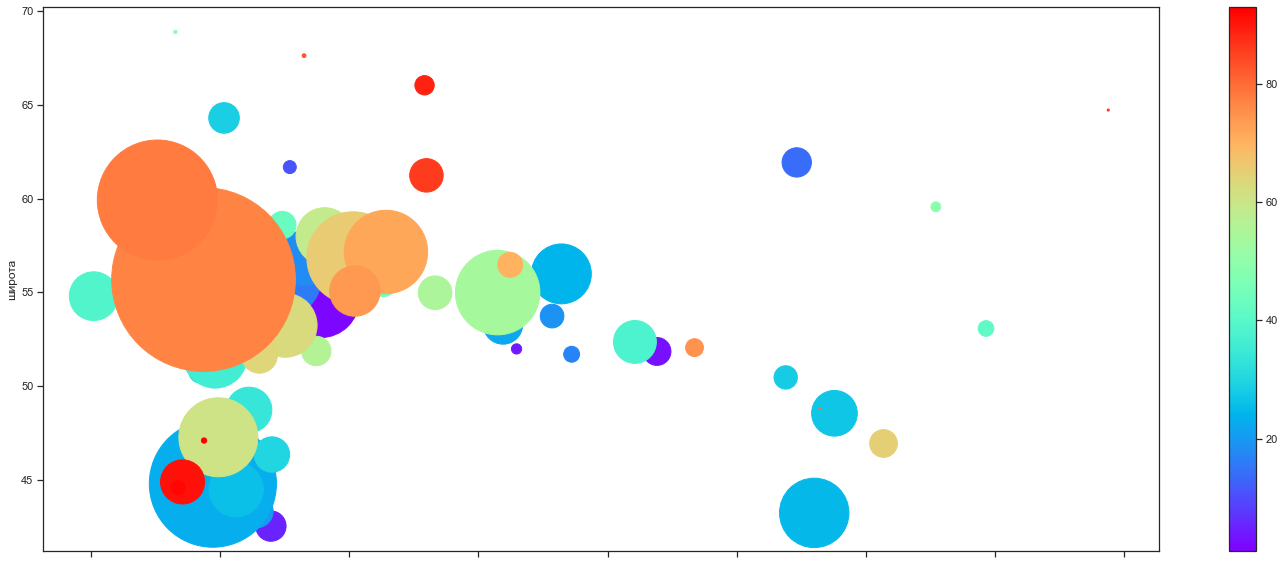

In [97]:
# наносим на карту количество жилой площади в разных регионах и показываем их размером точки, разделяем регионы по цветам
color = df_sum_squares['код_региона']
size = df_sum_squares['жилая_площадь'] / 500
df_sum_squares.plot.scatter(x='долгота', y='широта', c=color, s=size, figsize=(25 , 10), cmap='rainbow')

Самый большой объем жилья вводится в Москве
Далее идут Питер, Московская область и Краснодарский край